# Visualisation

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

file = '/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/tests/results.txt'
df = pd.read_csv(file, sep=' ', header=None)
df.columns = ['test', 'kappa', 'time']
df[['mission', 'world', 'col1', 'col2', 'col3']] = df.test.str.split("-", expand=True)
# convert to int
df['col1'] = df['col1'].astype(float)
df['col2'] = df['col2'].astype(float)
df['col3'] = df['col3'].astype(float)
df.loc[df['mission'] == 'investigation_polygonale', 'n_points'] = df['col1']
df.loc[df['mission'] == 'investigation_polygonale', 'n_crawlers'] = df['col2']
df.loc[df['mission'] == 'investigation_polygonale', 'distance'] = df['col3']
df.loc[df['mission'] == 'ski_nordique', 'stride'] = df['col2']
df.loc[df['mission'] == 'ski_nordique', 'distance'] = df['col1']
df.loc[df['mission'] == 'peinture_au_rouleau', 'distance'] = df['col1']
df = df.drop(columns=['test', 'col1', 'col2', 'col3'])
df = df[['mission', 'world', 'distance', 'stride', 'n_points', 'n_crawlers', 'kappa', 'time']]
df

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
0,peinture_au_rouleau,test_model_5,6.0,NaN,NaN,NaN,0.17,218.25
1,peinture_au_rouleau,test_model_5,3.0,NaN,NaN,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_5,2.0,NaN,NaN,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_5,1.0,NaN,NaN,NaN,0.62,553.13
4,peinture_au_rouleau,test_model_8,6.0,NaN,NaN,NaN,0.15,216.47
...,...,...,...,...,...,...,...,...
170,investigation_polygonale,test_model_11,2.0,NaN,4.0,2.0,0.76,1382.92
171,investigation_polygonale,test_model_11,1.0,NaN,4.0,2.0,0.78,1051.36
172,investigation_polygonale,test_model_15,3.0,NaN,4.0,2.0,0.79,2150.23
173,investigation_polygonale,test_model_15,2.0,NaN,4.0,2.0,0.79,1797.69


## Peinture au rouleau

In [173]:
df_par = df.loc[df['mission'] == 'peinture_au_rouleau']
df_par

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
0,peinture_au_rouleau,test_model_5,6.0,NaN,NaN,NaN,0.17,218.25
1,peinture_au_rouleau,test_model_5,3.0,NaN,NaN,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_5,2.0,NaN,NaN,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_5,1.0,NaN,NaN,NaN,0.62,553.13
4,peinture_au_rouleau,test_model_8,6.0,NaN,NaN,NaN,0.15,216.47
5,peinture_au_rouleau,test_model_8,3.0,NaN,NaN,NaN,0.44,251.97
6,peinture_au_rouleau,test_model_8,2.0,NaN,NaN,NaN,0.62,338.82
7,peinture_au_rouleau,test_model_8,1.0,NaN,NaN,NaN,0.73,551.11
8,peinture_au_rouleau,test_model_11,6.0,NaN,NaN,NaN,0.09,216.59
9,peinture_au_rouleau,test_model_11,3.0,NaN,NaN,NaN,0.25,254.39


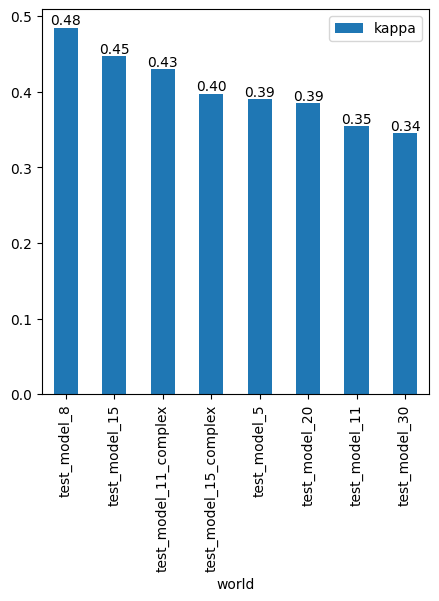

In [138]:
# kappa vs world
ax = df_par.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world.png', bbox_inches='tight')
plt.show()

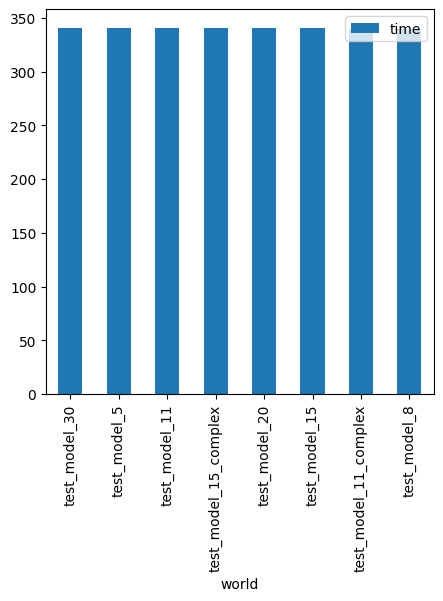

In [139]:
# time vs world
df_par.groupby(['world'])[["time"]].mean().sort_values(by='time', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world.png', bbox_inches='tight')
plt.show()

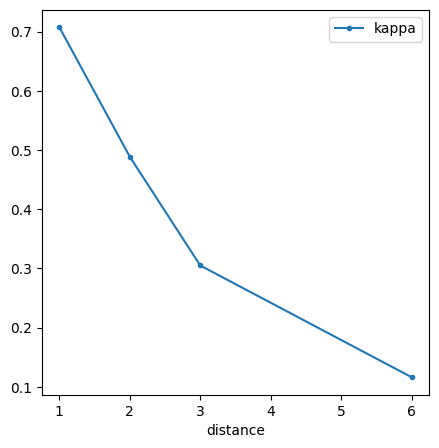

In [140]:
# kappa vs distance
df_par.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

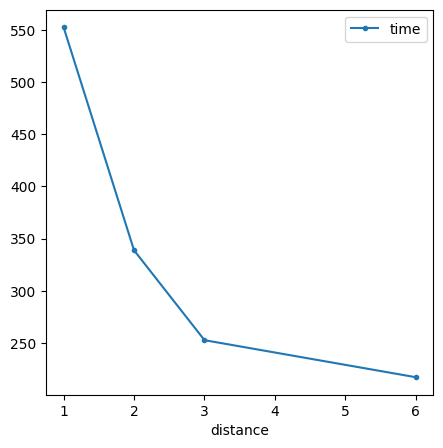

In [141]:
# time vs distance
df_par.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_distance.png', bbox_inches='tight')
plt.show()

## Ski nordique

In [174]:
df_sn = df.loc[df['mission'] == 'ski_nordique']
df_sn

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
32,ski_nordique,test_model_5,6.0,1.0,NaN,NaN,0.32,447.06
33,ski_nordique,test_model_5,6.0,2.0,NaN,NaN,0.38,491.01
34,ski_nordique,test_model_5,6.0,3.0,NaN,NaN,0.59,543.42
35,ski_nordique,test_model_5,6.0,6.0,NaN,NaN,0.55,701.10
36,ski_nordique,test_model_5,3.0,1.0,NaN,NaN,0.48,768.98
...,...,...,...,...,...,...,...,...
155,ski_nordique,test_model_15_complex,2.0,6.0,NaN,NaN,0.49,1965.49
156,ski_nordique,test_model_15_complex,1.0,1.0,NaN,NaN,0.84,2133.30
157,ski_nordique,test_model_15_complex,1.0,2.0,NaN,NaN,0.79,2437.45
158,ski_nordique,test_model_15_complex,1.0,3.0,NaN,NaN,0.73,2805.68


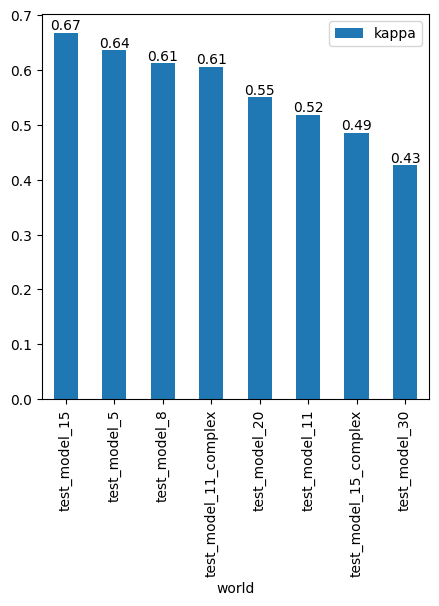

In [143]:
# kappa vs world
ax = df_sn.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_world.png', bbox_inches='tight')
plt.show()

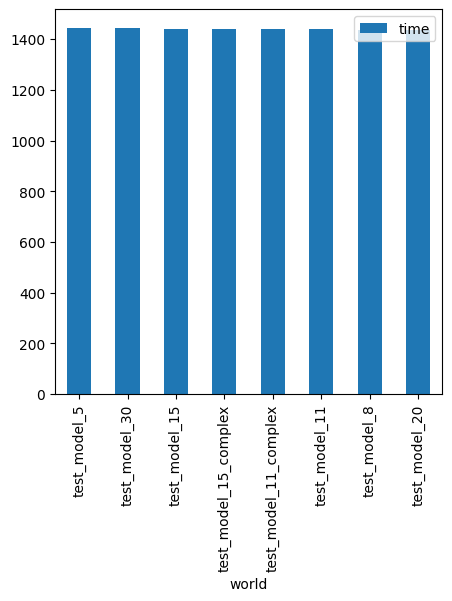

In [144]:
# time vs world
df_sn.groupby(['world'])[["time"]].mean().sort_values(by='time', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_world.png', bbox_inches='tight')
plt.show()

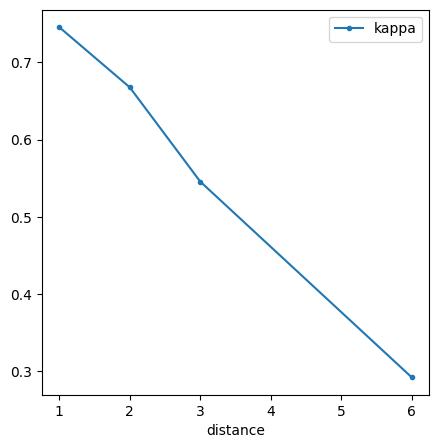

In [145]:
# kappa vs distance
df_sn.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

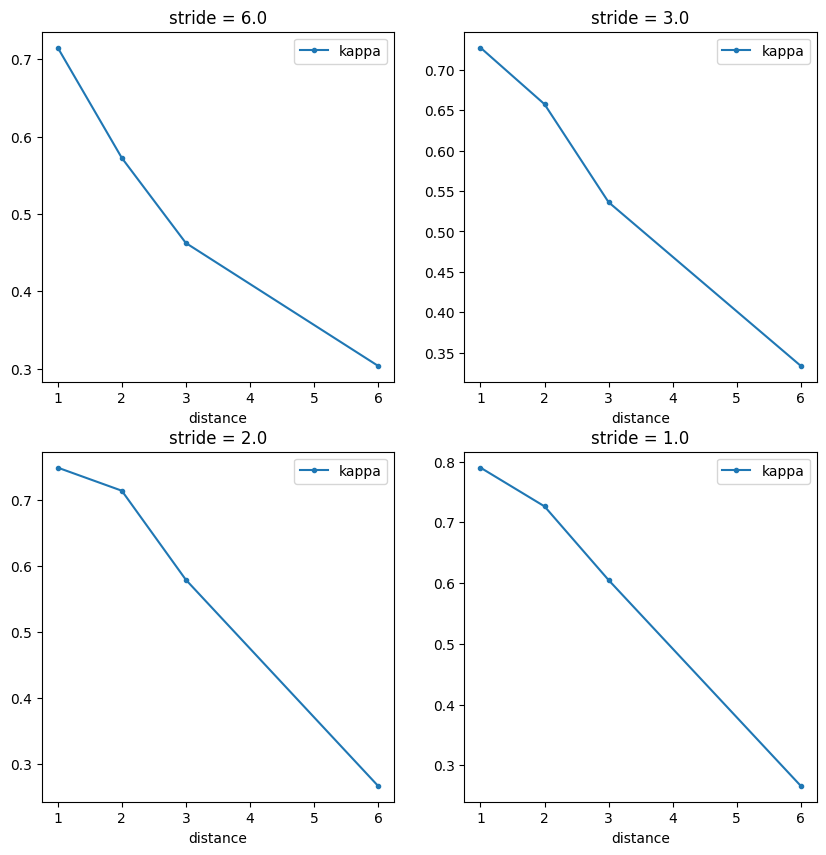

In [146]:
# kappa vs distance, specific stride
df_sn_6 = df_sn.loc[df_sn['stride'] == 6.0]
df_sn_3 = df_sn.loc[df_sn['stride'] == 3.0]
df_sn_2 = df_sn.loc[df_sn['stride'] == 2.0]
df_sn_1 = df_sn.loc[df_sn['stride'] == 1.0]

fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='stride = 6.0', figsize=(10,10))
df_sn_3.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='stride = 3.0', figsize=(10,10))
df_sn_2.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='stride = 2.0', figsize=(10,10))
df_sn_1.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='stride = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_distance_specific_stride.png', bbox_inches='tight')
plt.show()

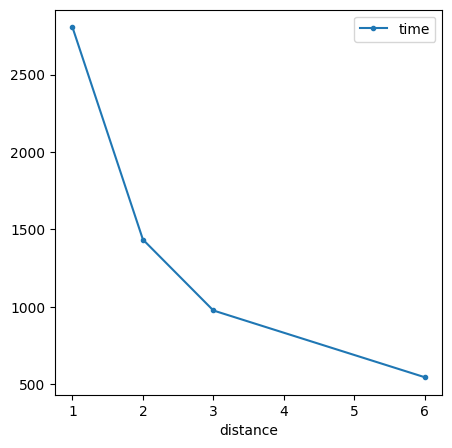

In [147]:
# time vs distance
df_sn.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_distance.png', bbox_inches='tight')
plt.show()

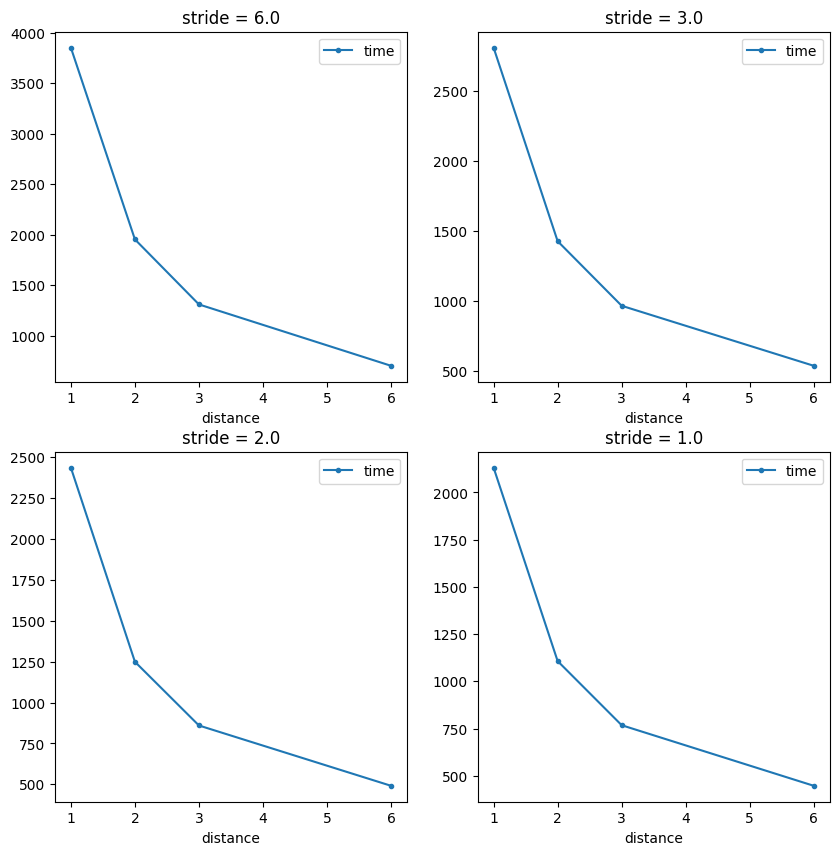

In [148]:
# time vs distance, specific stride
fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='stride = 6.0', figsize=(10,10))
df_sn_3.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='stride = 3.0', figsize=(10,10))
df_sn_2.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='stride = 2.0', figsize=(10,10))
df_sn_1.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='stride = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_distance_specific_stride.png', bbox_inches='tight')
plt.show()

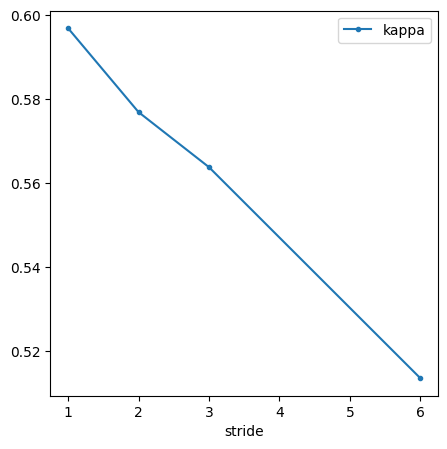

In [149]:
# kappa vs stride
df_sn.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_stride.png', bbox_inches='tight')
plt.show()

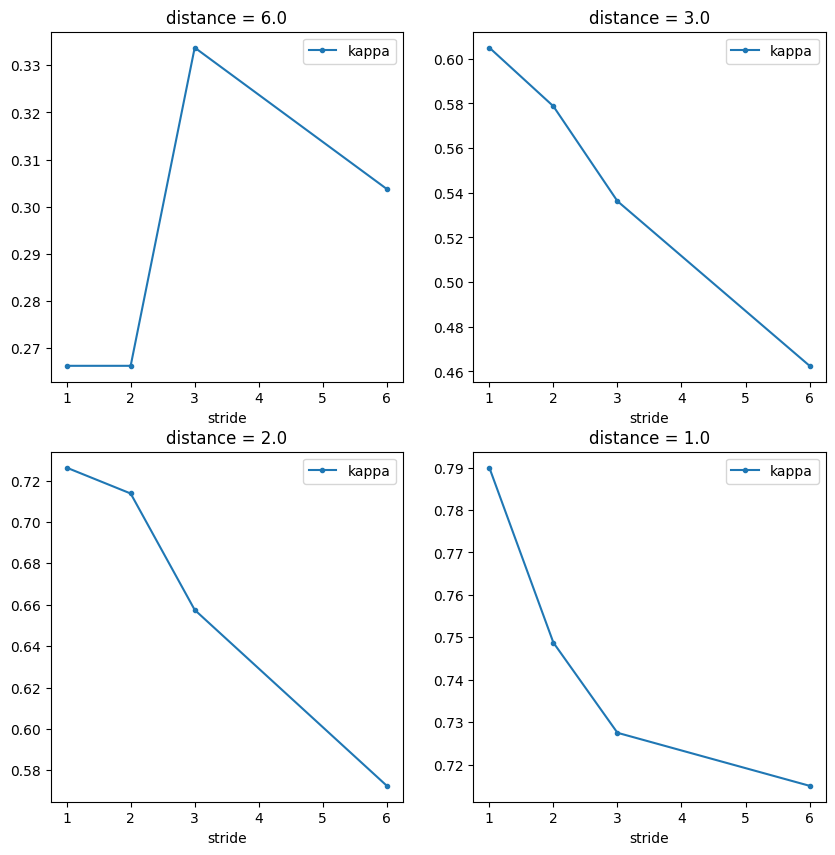

In [150]:
# kappa vs stride, specific distance
df_sn_6 = df_sn.loc[df_sn['distance'] == 6.0]
df_sn_3 = df_sn.loc[df_sn['distance'] == 3.0]
df_sn_2 = df_sn.loc[df_sn['distance'] == 2.0]
df_sn_1 = df_sn.loc[df_sn['distance'] == 1.0]

fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='distance = 6.0', figsize=(10,10))
df_sn_3.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='distance = 3.0', figsize=(10,10))
df_sn_2.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='distance = 2.0', figsize=(10,10))
df_sn_1.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='distance = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_stride_specific_distance.png', bbox_inches='tight')
plt.show()

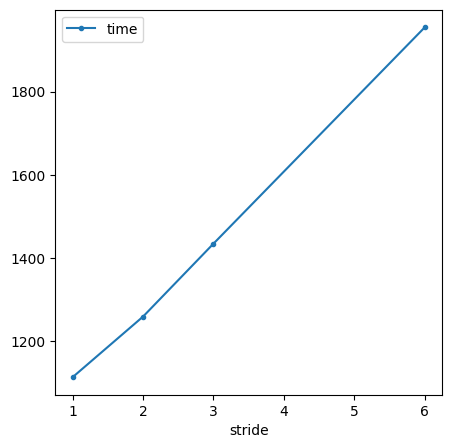

In [151]:
# time vs stride
df_sn.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_stride.png', bbox_inches='tight')
plt.show()

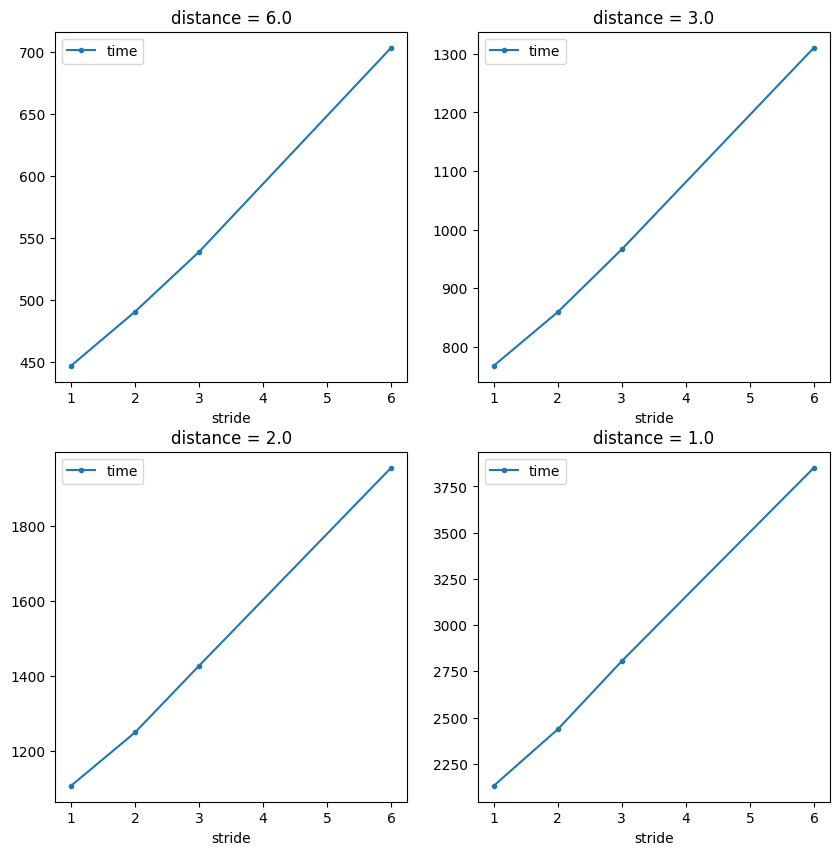

In [152]:
# time vs stride, specific distance
fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='distance = 6.0', figsize=(10,10))
df_sn_3.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='distance = 3.0', figsize=(10,10))
df_sn_2.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='distance = 2.0', figsize=(10,10))
df_sn_1.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='distance = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_stride_specific_distance.png', bbox_inches='tight')
plt.show()

## Investigation polygonale

In [177]:
df_ip = df.loc[df['mission'] == 'investigation_polygonale']
df_ip

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
160,investigation_polygonale,test_model_5,3.0,NaN,4.0,2.0,0.86,558.83
161,investigation_polygonale,test_model_5,6.0,NaN,4.0,2.0,0.77,742.06
162,investigation_polygonale,test_model_5,2.0,NaN,4.0,2.0,0.74,600.60
163,investigation_polygonale,test_model_5,1.0,NaN,4.0,2.0,0.86,500.68
164,investigation_polygonale,test_model_8,6.0,NaN,4.0,2.0,0.78,1421.44
165,investigation_polygonale,test_model_8,3.0,NaN,4.0,2.0,0.80,899.76
166,investigation_polygonale,test_model_8,2.0,NaN,4.0,2.0,0.83,824.83
167,investigation_polygonale,test_model_8,1.0,NaN,4.0,2.0,0.80,744.69
168,investigation_polygonale,test_model_11,6.0,NaN,4.0,2.0,0.73,2795.56
169,investigation_polygonale,test_model_11,3.0,NaN,4.0,2.0,0.75,1983.42


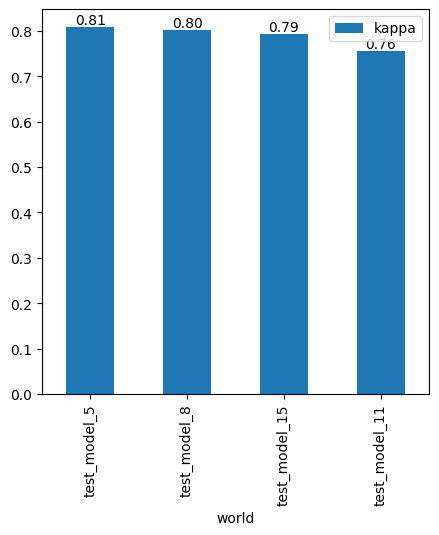

In [154]:
# kappa vs world
ax = df_ip.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-kappa_vs_world.png', bbox_inches='tight')
plt.show()

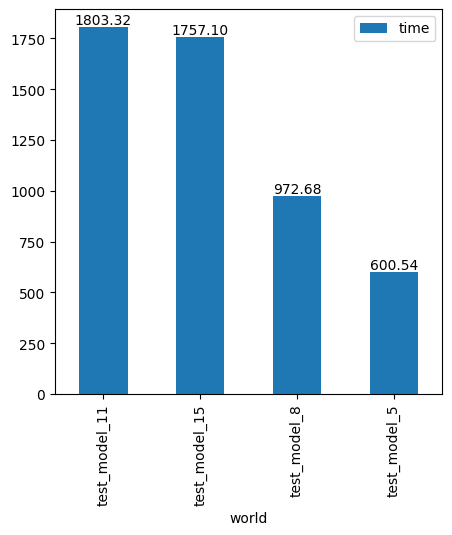

In [155]:
# time vs world
ax = df_ip.groupby(['world'])[["time"]].mean().sort_values(by='time', ascending=False).plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-time_vs_world.png', bbox_inches='tight')
plt.show()

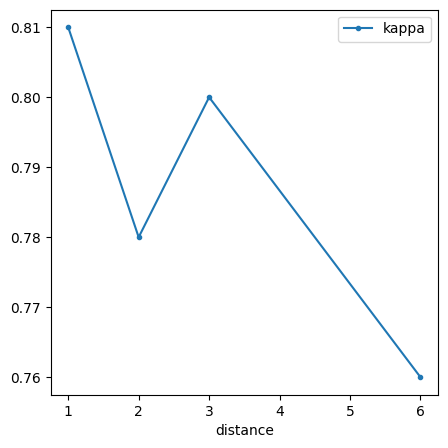

In [156]:
# kapap vs distance
df_ip.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

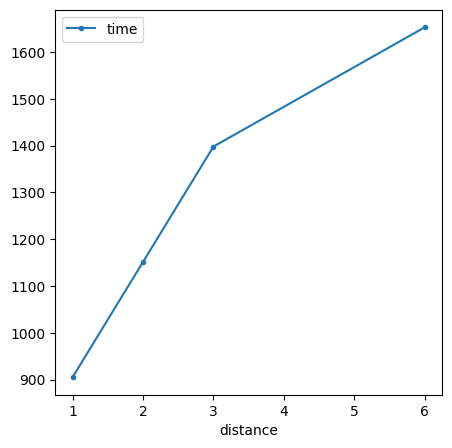

In [157]:
# time vs distance
df_ip.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-time_vs_distance.png', bbox_inches='tight')
plt.show()

## Peinture au rouleau VS Ski nordique VS Investigation polygonale

In [178]:
df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]

df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]

df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]

df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]

df

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
0,peinture_au_rouleau,test_model_5,6.0,NaN,NaN,NaN,0.17,NaN
1,peinture_au_rouleau,test_model_5,3.0,NaN,NaN,NaN,0.29,NaN
2,peinture_au_rouleau,test_model_5,2.0,NaN,NaN,NaN,0.48,NaN
3,peinture_au_rouleau,test_model_5,1.0,NaN,NaN,NaN,0.62,NaN
4,peinture_au_rouleau,test_model_8,6.0,NaN,NaN,NaN,0.15,NaN
...,...,...,...,...,...,...,...,...
170,investigation_polygonale,test_model_11,2.0,NaN,4.0,2.0,0.76,1721.31
171,investigation_polygonale,test_model_11,1.0,NaN,4.0,2.0,0.78,1604.68
172,investigation_polygonale,test_model_15,3.0,NaN,4.0,2.0,0.79,2402.53
173,investigation_polygonale,test_model_15,2.0,NaN,4.0,2.0,0.79,2137.90


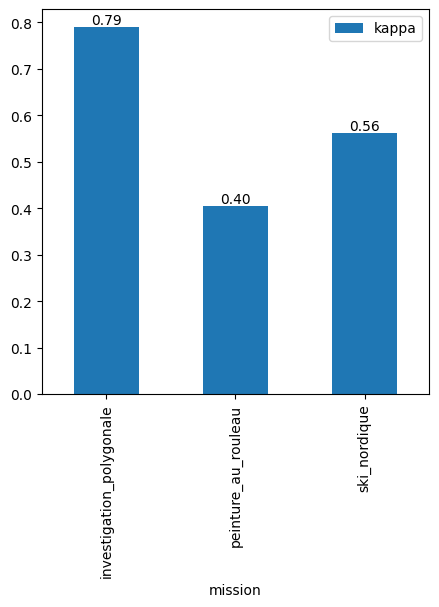

peinture au rouleau kappa: 0.40
ski nordique kappa: 0.56
investigation polygonale kappa: 0.79


In [159]:
# peinture au rouleau kappa vs ski nordique kappa
ax = df.groupby(['mission'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_ski_nordique_vs_investigation_polygonale-kappa.png', bbox_inches='tight')
plt.show()
print(f'peinture au rouleau kappa: {df.loc[df["mission"] == "peinture_au_rouleau"]["kappa"].mean():.2f}')
print(f'ski nordique kappa: {df.loc[df["mission"] == "ski_nordique"]["kappa"].mean():.2f}')
print(f'investigation polygonale kappa: {df.loc[df["mission"] == "investigation_polygonale"]["kappa"].mean():.2f}')

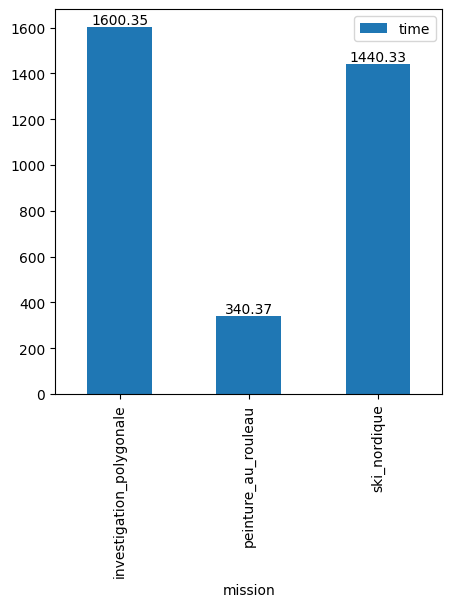

peinture au rouleau time: 340.37 sec (5.67) min
ski nordique time: 1440.33 sec (24.01 min)
investigation polygonale time: 1600.35 sec (26.67 min)


In [160]:
# peinture au rouleau time vs ski nordique time vs investigation polygonale time
ax = df.groupby(['mission'])[["time"]].mean().plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_ski_nordique-time.png', bbox_inches='tight')
plt.show()
print(f'peinture au rouleau time: {df.loc[df["mission"] == "peinture_au_rouleau"]["time"].mean():.2f} sec ({df.loc[df["mission"] == "peinture_au_rouleau"]["time"].mean()/60:.2f}) min')
print(f'ski nordique time: {df.loc[df["mission"] == "ski_nordique"]["time"].mean():.2f} sec ({df.loc[df["mission"] == "ski_nordique"]["time"].mean()/60:.2f} min)')
print(f'investigation polygonale time: {df.loc[df["mission"] == "investigation_polygonale"]["time"].mean():.2f} sec ({df.loc[df["mission"] == "investigation_polygonale"]["time"].mean()/60:.2f} min)')

## Evolution entre Peinture au rouleau et Investigation polygonale

In [182]:
# only select subset where we have data for all missions
df_base = df_par.loc[df_par['mission'] == 'peinture_au_rouleau'] 
df_base = pd.concat([
    df_base.loc[df_base['world'] == 'test_model_5'], 
    df_base.loc[df_base['world'] == 'test_model_8'], 
    df_base.loc[df_base['world'] == 'test_model_11'], 
    df_base.loc[df_base['world'] == 'test_model_15']
])
df_base.drop(df_base[(df_base['distance'] == 6.0)].index, inplace=True)

df_improve = df_ip.loc[df_ip['mission'] == 'investigation_polygonale']
df_improve = pd.concat([
    df_improve.loc[df_improve['world'] == 'test_model_5'], 
    df_improve.loc[df_improve['world'] == 'test_model_8'],
	df_improve.loc[df_improve['world'] == 'test_model_11'],
    df_improve.loc[df_improve['world'] == 'test_model_15']
])
df_improve.drop(df_improve[(df_improve['distance'] == 6.0)].index, inplace=True)

df_other = df_sn.loc[df_sn['mission'] == 'ski_nordique']
df_other = pd.concat([
    df_other.loc[df_other['world'] == 'test_model_5'], 
    df_other.loc[df_other['world'] == 'test_model_8'], 
    df_other.loc[df_other['world'] == 'test_model_11'], 
    df_other.loc[df_other['world'] == 'test_model_15']
])
df_other.drop(df_other[(df_other['distance'] == 6.0)].index, inplace=True)

df_final = pd.concat([df_base, df_improve, df_other])

df_final

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
1,peinture_au_rouleau,test_model_5,3.0,NaN,NaN,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_5,2.0,NaN,NaN,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_5,1.0,NaN,NaN,NaN,0.62,553.13
5,peinture_au_rouleau,test_model_8,3.0,NaN,NaN,NaN,0.44,251.97
6,peinture_au_rouleau,test_model_8,2.0,NaN,NaN,NaN,0.62,338.82
...,...,...,...,...,...,...,...,...
91,ski_nordique,test_model_15,2.0,6.0,NaN,NaN,0.72,1960.88
92,ski_nordique,test_model_15,1.0,1.0,NaN,NaN,0.81,2132.64
93,ski_nordique,test_model_15,1.0,2.0,NaN,NaN,0.81,2441.03
94,ski_nordique,test_model_15,1.0,3.0,NaN,NaN,0.80,2810.34


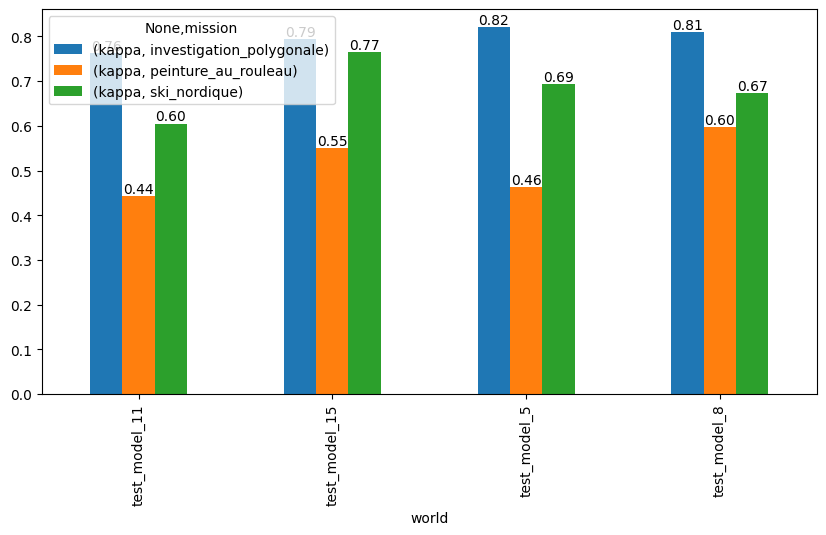

In [180]:
# evolution of kappa between peinture au rouleau and investigation polygonale
ax = df_final.groupby(['mission', 'world'])[["kappa"]].mean().unstack('mission').plot(kind='bar', figsize=(10, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

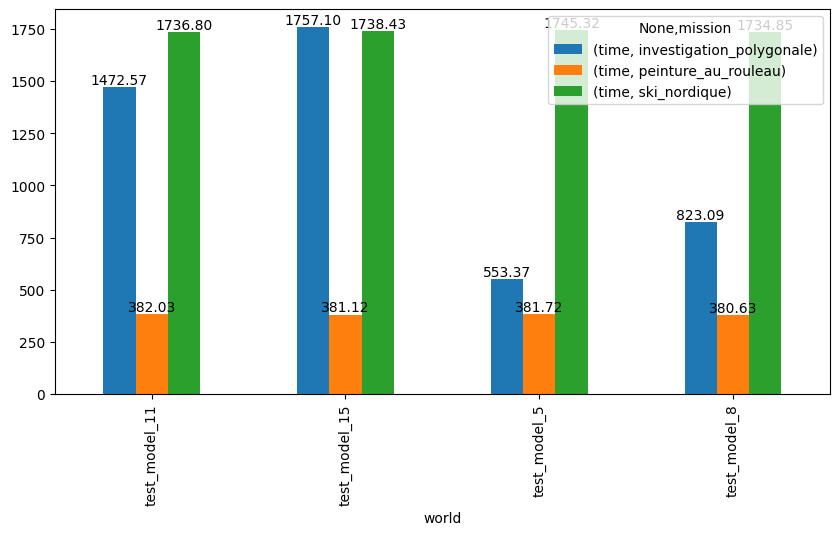

In [181]:
# evolution of time between peinture au rouleau and investigation polygonale
ax = df_final.groupby(['mission', 'world'])[["time"]].mean().unstack('mission').plot(kind='bar', figsize=(10, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

## Density

In [164]:
import cv2 as cv

test_model_5 = '../graphics/test_model_5.png'
test_model_8 = '../graphics/test_model_8.png'
test_model_11 = '../graphics/test_model_11.png'
test_model_15 = '../graphics/test_model_15.png'
test_model_20 = '../graphics/test_model_20.png'
test_model_30 = '../graphics/test_model_30.png'
test_model_11_complex = '../graphics/test_model_11_complex.png'
test_model_15_complex = '../graphics/test_model_15_complex.png'

def get_density(template):
	l, w, _ = template.shape
	density = 0
	for i in range(l):
		for j in range(w):
			if template[i][j][0] == 0 and template[i][j][1] == 0 and template[i][j][2] == 0:
				density += 1
	print(density)
	return density / (l * w)

print(f'test_model_5: {get_density(cv.imread(test_model_5))}')
print(f'test_model_8: {get_density(cv.imread(test_model_8))}')
print(f'test_model_11: {get_density(cv.imread(test_model_11))}')
print(f'test_model_15: {get_density(cv.imread(test_model_15))}')
print(f'test_model_20: {get_density(cv.imread(test_model_20))}')
print(f'test_model_30: {get_density(cv.imread(test_model_30))}')
print(f'test_model_11_complex: {get_density(cv.imread(test_model_11_complex))}')
print(f'test_model_15_complex: {get_density(cv.imread(test_model_15_complex))}')

16816
test_model_5: 0.012894083872887152
33518
test_model_8: 0.02570075542646477
29555
test_model_11: 0.022662027168362263
32049
test_model_15: 0.02457436334694103
47250
test_model_20: 0.03623010602960977
68143
test_model_30: 0.05225033047990897
65082
test_model_11_complex: 0.04990323302897488
114884
test_model_15_complex: 0.08809014817154898
